In [2]:
%reset -f 
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [3]:


from _lib.main import *

from pylab import *
from matplotlib import gridspec
from matplotlib import pyplot as plt


import numpy as np

In [4]:
# Load EXP
exp = mXANES(data_loadfrom='exp.dat',xanesid='Exp.',Eonset=528.8)
exp.transform(irange=[0,30],e0shift=True, y0shift=True, normalize='max')

spectra = []
for i in ['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14']:
    os.chdir('snap_'+i)
    E, I = np.load('_E.npy'), np.load('_Itot.npy')
    sp = mXANES(data=[E,I],xanesid=i)
    sp.transform(irange=[-5,30],normalize='none')
    spectra.append(sp)
    os.chdir('..')

spectra_broad = []    
for i in ['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14']:
    os.chdir('snap_'+i)
    E, I = np.load('_E.npy'), np.load('_Itot.npy')
    sp = mXANES(data=[E,I],xanesid=i)
    sp.broaden0(g_sigma=0.5,lvl=[0.1,0.1,sp.Eonset+10])
    sp.transform(irange=[-5,30],normalize='none')
    spectra_broad.append(sp)
    os.chdir('..')

<IPython.core.display.Javascript object>


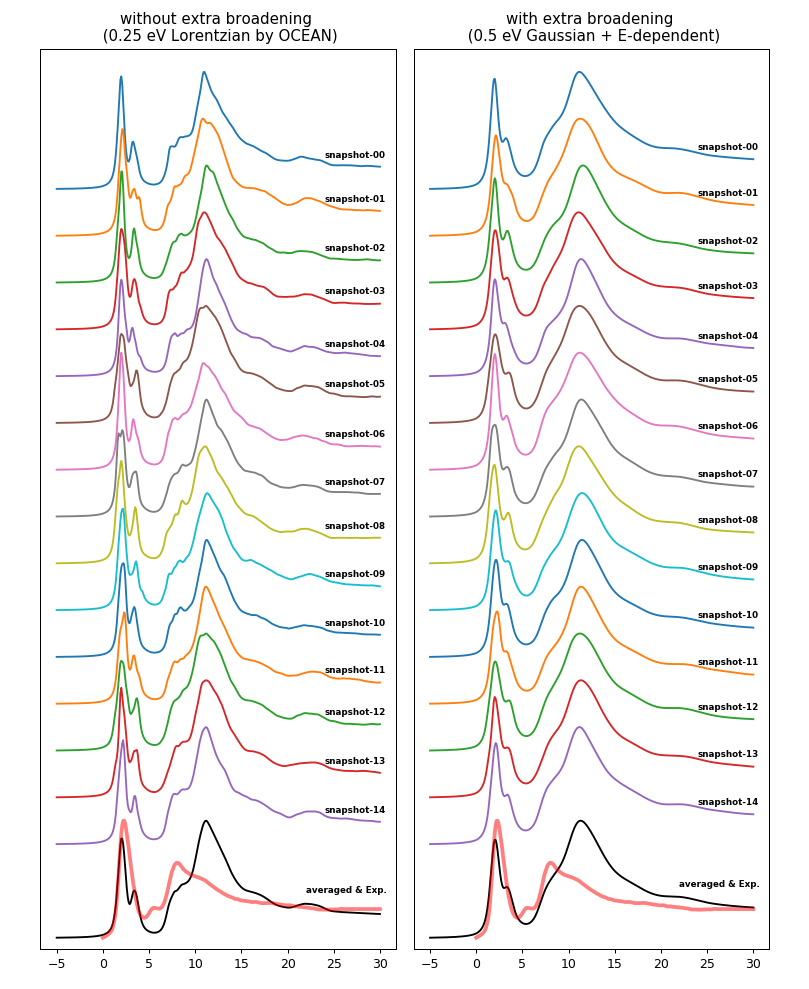

In [15]:
from matplotlib import gridspec
fig = plt.figure(figsize=(9,11))
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], height_ratios=[1] )
gs.update(top=0.95, bottom=0.04, left=0.05, right=0.95, wspace=0.05, hspace=0.05)



ax = fig.add_subplot(gs[0])

s = 0.0
sum_sp = spectra[0].E*0
for i in spectra:
    E,I = i.E,i.I/max(i.I)
    ax.plot(E,s+I)
    ax.text(E[-1]-6,s+I[-1]+0.1,'snapshot-'+i.xanesid,weight='bold', size=7, va="center", ha="left", rotation=0)  
    sum_sp += i.I
    s -= 0.4    
sum_sp = sum_sp/15; sum_sp = sum_sp/max(sum_sp)
ax.plot(i.E,s-0.4+sum_sp,'k')   
ax.plot(exp.E,s-0.4+exp.I,'r',lw=3,alpha=0.5) 
ax.text(i.E[-1]-8,s-0.2+sum_sp[-1],'averaged & Exp.',weight='bold', size=7, va="center", ha="left", rotation=0)  
ax.set_title('without extra broadening \n (0.25 eV Lorentzian by OCEAN)')
ax.set_yticks([])
ax.set_ylim([-6.5,1.2])



ax = fig.add_subplot(gs[1])

s = 0.0
sum_sp = spectra_broad[0].E*0
for i in spectra_broad:
    E,I = i.E,i.I/max(i.I)
    ax.plot(E,s+I)
    ax.text(E[-1]-6,s+I[-1]+0.1,'snapshot-'+i.xanesid,weight='bold', size=7, va="center", ha="left", rotation=0)  
    sum_sp += i.I
    s -= 0.4    
sum_sp = sum_sp/15; sum_sp = sum_sp/max(sum_sp)
ax.plot(i.E,s-0.4+sum_sp,'k')   
ax.plot(exp.E,s-0.4+exp.I,'r',lw=3,alpha=0.5) 
ax.text(i.E[-1]-8,s-0.2+sum_sp[-1],'averaged & Exp.',weight='bold', size=7, va="center", ha="left", rotation=0)  
ax.set_title('with extra broadening \n (0.5 eV Gaussian + E-dependent)')
ax.set_yticks([])
ax.set_ylim([-6.5,1.2])

savefig('plot.png', format='png', dpi=300)
